In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import os
import matplotlib.pyplot as plt
from numpy import exp, abs, log
import pickle
from metrics import *

import universal as up
from universal import tools, algos
from universal.algos import *

<AxesSubplot:>

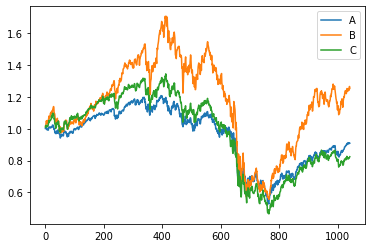

In [2]:
data = tools.dataset('msci')

# plot first three of them as example
data.iloc[:,:3].plot()

In [3]:
data

,A,B,C,D,E,F,G,H,I,J,...,O,P,Q,R,S,T,U,V,W,X
0,1.001782,1.016927,1.010548,1.007359,1.021224,1.006425,1.006093,1.002848,1.014207,1.006901,...,1.013190,1.002958,1.009867,1.007334,1.005961,1.010875,1.004824,1.004028,0.997047,1.014587
1,1.007820,1.017620,1.017713,1.016905,1.026884,1.017003,1.002457,1.010919,1.007791,1.007001,...,1.015242,1.020511,1.021184,1.010326,1.008209,1.021070,1.007876,1.015128,1.010763,1.015643
2,1.012077,1.036428,1.020599,1.024264,1.035751,1.019474,1.007370,1.017566,1.017507,1.023505,...,1.015242,1.024258,1.024376,1.014379,1.013681,1.031459,1.021953,1.017583,1.010287,1.013820
3,1.010097,1.049693,1.022191,1.023369,1.025941,1.014729,1.009827,1.011584,1.028231,1.031306,...,1.037323,1.043092,1.021958,1.011967,1.012020,1.038062,1.033274,1.015422,1.014954,1.031478
4,1.000099,1.045041,1.013335,1.013922,1.008490,0.997034,1.013168,1.007311,1.016774,1.030606,...,1.039277,1.043881,0.999807,0.994499,0.997752,1.025342,1.030321,1.003340,0.997809,1.033397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,0.906256,1.248763,0.816101,1.048926,1.021696,1.031139,1.313090,0.789878,0.852704,0.719544,...,1.203908,0.510009,0.948346,0.864312,0.806411,1.200990,1.166667,0.566896,0.496428,0.714683
1039,0.906949,1.242031,0.813713,1.045048,1.011037,1.033808,1.323703,0.795670,0.847938,0.714843,...,1.222570,0.539789,0.950377,0.865856,0.811004,1.194485,1.155641,0.565324,0.497285,0.726679
1040,0.912196,1.256682,0.819086,1.050219,1.008773,1.040826,1.341293,0.807064,0.857654,0.720944,...,1.229897,0.537915,0.961211,0.872901,0.810124,1.196136,1.173262,0.569450,0.504905,0.725528
1041,0.912394,1.266581,0.820281,1.049423,1.004056,1.026394,1.344143,0.803361,0.854904,0.721144,...,1.231363,0.523321,0.955407,0.866628,0.804163,1.192155,1.174542,0.564735,0.501953,0.732534


In [4]:
df_close = log(data)
ll = df_close.shape[0]

for i in list(range(1, ll))[::-1]:
    df_close.iloc[i] -= df_close.iloc[i-1]

In [5]:
df_close

,A,B,C,D,E,F,G,H,I,J,...,O,P,Q,R,S,T,U,V,W,X
0,0.001780,0.016786,0.010493,0.007332,0.021002,0.006405,0.006074,0.002844,0.014107,0.006878,...,0.013104,0.002954,0.009818,0.007308,0.005943,0.010816,0.004812,0.004019,-0.002957,0.014482
1,0.006010,0.000681,0.007065,0.009432,0.005527,0.010455,-0.003621,0.008016,-0.006346,0.000099,...,0.002023,0.017349,0.011145,0.002966,0.002232,0.010035,0.003033,0.010995,0.013662,0.001040
2,0.004215,0.018314,0.002832,0.007210,0.008598,0.002427,0.004890,0.006553,0.009595,0.016256,...,0.000000,0.003665,0.003121,0.004004,0.005413,0.010124,0.013871,0.002416,-0.000471,-0.001797
3,-0.001958,0.012717,0.001559,-0.000874,-0.009517,-0.004665,0.002436,-0.005896,0.010484,0.007593,...,0.021516,0.018221,-0.002364,-0.002381,-0.001640,0.006381,0.011017,-0.002126,0.004609,0.017268
4,-0.009947,-0.004442,-0.008702,-0.009274,-0.017156,-0.017592,0.003303,-0.004233,-0.011205,-0.000679,...,0.001882,0.000756,-0.021914,-0.017412,-0.014198,-0.012329,-0.002862,-0.011970,-0.017036,0.001859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,-0.002182,0.002301,0.006729,0.002183,0.011328,0.020533,-0.000224,0.008693,0.000538,0.012167,...,-0.009129,-0.000387,0.014486,0.011906,0.013911,0.002428,0.007538,0.002429,0.024865,-0.008291
1039,0.000764,-0.005405,-0.002931,-0.003704,-0.010488,0.002585,0.008050,0.007306,-0.005605,-0.006555,...,0.015382,0.056750,0.002140,0.001785,0.005679,-0.005431,-0.009496,-0.002776,0.001725,0.016646
1040,0.005768,0.011727,0.006582,0.004936,-0.002242,0.006766,0.013201,0.014218,0.011393,0.008499,...,0.005976,-0.003477,0.011335,0.008104,-0.001085,0.001381,0.015133,0.007272,0.015207,-0.001586
1041,0.000217,0.007846,0.001457,-0.000758,-0.004686,-0.013964,0.002122,-0.004599,-0.003211,0.000277,...,0.001191,-0.027506,-0.006056,-0.007212,-0.007385,-0.003334,0.001090,-0.008315,-0.005865,0.009610


In [6]:
cp = df_close
for phs in range(0, 100000):
    print('Phase: %d'%phs)
    ntrain = 300
    ntest = 100
    win = 5
    nstock = df_close.shape[1]
    choice = np.arange(nstock)
    
    train_st = phs*ntest
    train_ed = test_st = phs*ntest+ntrain
    test_st = phs*ntest+ntrain-win
    test_ed = phs*ntest+ntrain+ntest
    if test_ed > ll:
        break
    
    cp_train = cp.iloc[train_st:train_ed, :]
    cp_test = cp.iloc[test_st:test_ed, :]

    cp_trainx = np.zeros((ntrain - win, win * nstock))
    cp_trainy = np.zeros((ntrain - win, nstock))

    cov_train = np.cov(np.exp(cp_train.to_numpy().T))
    
    for i in range(win, ntrain):
        cp_trainy[i - win] = cp_train.to_numpy()[i]
        for s in range(nstock):
            cp_trainx[i - win, s * win:(s + 1) * win] = cp_train.to_numpy()[i - win:i, s]

    cp_testx = np.zeros((ntest, win * nstock))
    cp_testy = np.zeros((ntest, nstock))

    for i in range(win, ntest + win):
        cp_testy[i - win] = cp_test.to_numpy()[i]
        for s in range(nstock):
            cp_testx[i - win, s * win:(s + 1) * win] = cp_test.to_numpy()[i - win:i, s]

    np.savez('./stock_data/MSCI_stock_phase%02d_lb%d' % (phs, win), rt_trainx=cp_trainx, rt_trainy=cp_trainy,  \
             rt_valx=None, rt_valy=None,  \
             rt_testx=cp_testx, rt_testy=cp_testy, choice=choice, cov_train=cov_train)
    
#     print(np.min(cov_train))

Phase: 0
-2.004454687700157e-06
Phase: 1
-1.1379171111375055e-05
Phase: 2
-8.209360797444481e-06
Phase: 3
-1.564350837139312e-05
Phase: 4
3.4114779921245258e-06
Phase: 5
3.220601933945577e-07
Phase: 6
-5.610256246558047e-06
Phase: 7
